In [1]:
%matplotlib notebook

In [18]:
# Import Dependencies Libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from pylab import rcParams
from pandas import Series

In [22]:
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
#Read in the China Data CSV to Dataframe
from pandas import read_csv
China_data_df = read_csv('china_cleaned_up_data1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
China_data_df

,Online Retail Sales Accumulated($US),Online Retail Sales Accumulated Growth Rate(%),Online Retail Sales in Goods Accumulated($US),Online Retail Sales in Goods Accumulated Growth Rate(%),Online Retail Sales in Food Accumulated Growth Rate(%),Online Retail Sales in Clothing Accumulated Growth Rate(%),Online Retail Sales in Necessities Accumulated Growth Rate(%),Total Retail Sales of Consumer Goods Current Period($US),Total Retail Sales of Consumer Goods Accumulated ($US),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),Total Retail Sales of Consumer Goods Accumulated Growth Rate (%)
Date,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6/20/2020,"7,339.70",1.04,"6,196.70",2.04,5.53,-0.41,2.47,"4,777.98","24,549.26",-0.26,-1.62
5/20/2020,"5,725.69",0.64,"4,808.32",1.64,5.27,-0.97,2.12,"4,556.64","19,771.29",-0.40,-1.92
4/20/2020,"4,374.96",0.24,"3,669.93",1.23,5.23,-1.71,1.77,"4,015.79","15,214.65",-1.07,-2.31
3/20/2020,"3,159.41",-0.11,"2,641.63",0.84,4.66,-2.15,1.43,"3,769.53","11,198.86",-2.25,-2.71
...,...,...,...,...,...,...,...,...,...,...,...
5/10/2020,nan,nan,nan,nan,nan,nan,nan,"1,775.05","8,599.34",2.67,2.59
4/10/2020,nan,nan,nan,nan,nan,nan,nan,"1,640.42","6,824.29",2.64,2.58
3/10/2020,nan,nan,nan,nan,nan,nan,nan,"1,613.52","5,183.88",2.57,2.55
2/10/2020,nan,nan,nan,nan,nan,nan,nan,"1,757.82","3,570.35",3.15,2.55


In [10]:
pd.options.display.float_format = "{:,.2f}".format
China_data_df.head()

,Online Retail Sales Accumulated($US),Online Retail Sales Accumulated Growth Rate(%),Online Retail Sales in Goods Accumulated($US),Online Retail Sales in Goods Accumulated Growth Rate(%),Online Retail Sales in Food Accumulated Growth Rate(%),Online Retail Sales in Clothing Accumulated Growth Rate(%),Online Retail Sales in Necessities Accumulated Growth Rate(%),Total Retail Sales of Consumer Goods Current Period($US),Total Retail Sales of Consumer Goods Accumulated ($US),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),Total Retail Sales of Consumer Goods Accumulated Growth Rate (%)
Date,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6/20/2020,"7,339.70",1.04,"6,196.70",2.04,5.53,-0.41,2.47,"4,777.98","24,549.26",-0.26,-1.62
5/20/2020,"5,725.69",0.64,"4,808.32",1.64,5.27,-0.97,2.12,"4,556.64","19,771.29",-0.40,-1.92
4/20/2020,"4,374.96",0.24,"3,669.93",1.23,5.23,-1.71,1.77,"4,015.79","15,214.65",-1.07,-2.31
3/20/2020,"3,159.41",-0.11,"2,641.63",0.84,4.66,-2.15,1.43,"3,769.53","11,198.86",-2.25,-2.71


In [11]:
China_data_df.dropna(how='all', inplace=True)
China_data_df.head()

,Online Retail Sales Accumulated($US),Online Retail Sales Accumulated Growth Rate(%),Online Retail Sales in Goods Accumulated($US),Online Retail Sales in Goods Accumulated Growth Rate(%),Online Retail Sales in Food Accumulated Growth Rate(%),Online Retail Sales in Clothing Accumulated Growth Rate(%),Online Retail Sales in Necessities Accumulated Growth Rate(%),Total Retail Sales of Consumer Goods Current Period($US),Total Retail Sales of Consumer Goods Accumulated ($US),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),Total Retail Sales of Consumer Goods Accumulated Growth Rate (%)
6/20/2020,"7,339.70",1.04,"6,196.70",2.04,5.53,-0.41,2.47,"4,777.98","24,549.26",-0.26,-1.62
5/20/2020,"5,725.69",0.64,"4,808.32",1.64,5.27,-0.97,2.12,"4,556.64","19,771.29",-0.40,-1.92
4/20/2020,"4,374.96",0.24,"3,669.93",1.23,5.23,-1.71,1.77,"4,015.79","15,214.65",-1.07,-2.31
3/20/2020,"3,159.41",-0.11,"2,641.63",0.84,4.66,-2.15,1.43,"3,769.53","11,198.86",-2.25,-2.71
2/20/2020,"1,954.18",-0.43,"1,600.91",0.43,3.76,-2.58,1.07,nan,"7,429.33",nan,-2.92


In [20]:
China_data_df2_annual = China_data_df2.resample('Y').sum() 

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

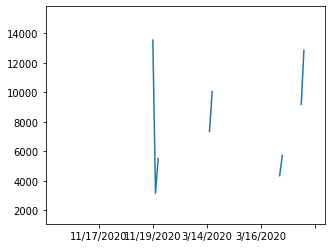

In [12]:
China_data_df2 = China_data_df.sample(n=100, random_state=100, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Online Retail Sales Accumulated($US)')

plt.title=('China Ecommerce Trends')
China_data_df2['Online Retail Sales Accumulated($US)'].plot()

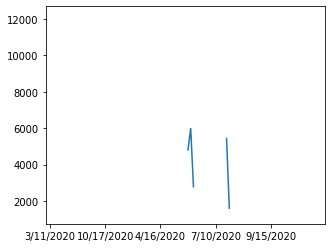

In [13]:
China_data_df3 = China_data_df.sample(n=100, random_state=120, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Online Retail Sales in Goods Accumulated($US)')

plt.title=('China Ecommerce Trends')
China_data_df3['Online Retail Sales in Goods Accumulated($US)'].plot()

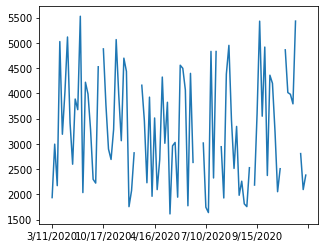

In [14]:
China_data_df4 = China_data_df.sample(n=100, random_state=120, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Total Retail Sales of Consumer Goods Current Period($US)')

plt.title=('China Ecommerce Trends')
China_data_df3['Total Retail Sales of Consumer Goods Current Period($US)'].plot()

In [27]:
China_data_df.index

DatetimeIndex(['2020-06-20', '2020-05-20', '2020-04-20', '2020-03-20',
               '2020-02-20', '2020-12-19', '2020-11-19', '2020-10-19',
               '2020-09-19', '2020-08-19',
               ...
               '2020-10-10', '2020-09-10', '2020-08-10', '2020-07-10',
               '2020-06-10', '2020-05-10', '2020-04-10', '2020-03-10',
               '2020-02-10', '2020-01-10'],
              dtype='datetime64[ns]', name='Date', length=117, freq=None)

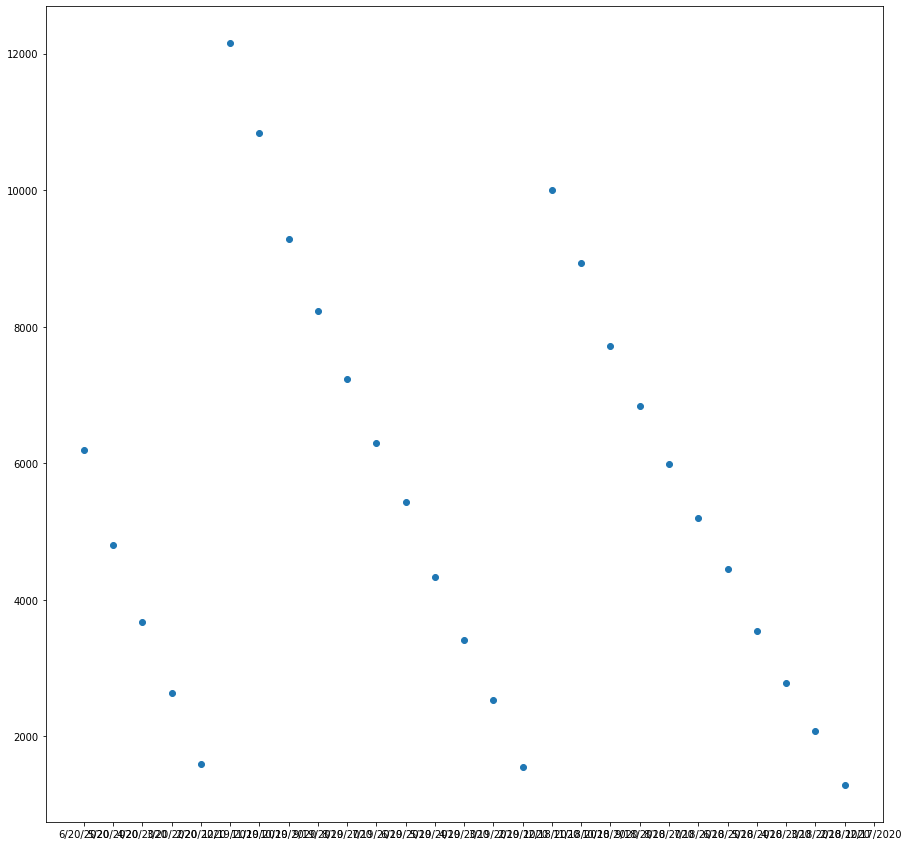

In [15]:
#plot figure
fig, ax = plt.subplots(figsize=(15,15))

#Add x-axis and y-axis
ax.scatter(China_data_df.index.values, China_data_df['Online Retail Sales in Goods Accumulated($US)'])

In [ ]:
#Convert China Monthly Data into Annual Data using bin groups 
# Create the bins in which Data will be held
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Create the names for the five bins
China_Annual_Data = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
#China_Annual_Data

China_data_df_mo["Annual Data Summary"] = pd.cut(China_data_df_mo["Binning group#"], bins, labels=China_Annual_Data)
China_data_df_mo

In [ ]:
#Group German Date into Annual format to merge with China file on Date
# Create the bins in which Data will be held
bins = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Create the names for the  bins
German_annual_data = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"]
German_annual_data

German_results_df["Annual Data Summary"] = pd.cut(German_results_df["Bin Group#"], bins, labels=German_annual_data)
#German_results_df

# Creating a group based off of the bins
df2= German_results_df.groupby("Annual Data Summary")
df2.max()

In [ ]:
#Merge 2 files on Annual Data Summary field for summary stats and graphing/plotting
df['Annual Data Summary'].value_counts()
df2['Annual Data Summary'].value_counts()
df = pd.concat([df2], axis=1) merge(`df2`)